In [1]:
import numpy as np
import healpy as hp
from astropy.io import ascii
from astropy.io import fits
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print 'Reading files'
w = ascii.read('wen.csv') 
r = fits.open('redmapper.fits') 
r = r[1].data
print len(w)
print len(r)

Reading files
132684
26111


In [228]:
# RA e DEC - catalogo Wen
w['RAJ2000'], w['DEJ2000']

(<MaskedColumn name='RAJ2000' dtype='float64' length=132684>
   0.00236
   0.00957
   0.01377
   0.01475
   0.01945
   0.02024
   0.02303
   0.02482
   0.02643
   0.02755
   0.02762
   0.02765
       ...
 359.96988
 359.97192
 359.97241
  359.9729
 359.97311
 359.97504
 359.97543
 359.98712
 359.99329
   359.995
 359.99677
  359.9986, <MaskedColumn name='DEJ2000' dtype='float64' length=132684>
  32.20925
   5.28827
  31.23175
  31.78564
   2.47386
  -3.54679
  35.76957
   15.4299
  22.20558
  10.11333
  31.87626
  29.35813
       ...
   0.69856
  -9.76429
  13.70903
   -7.9587
   3.45559
  30.13158
 -11.13708
  22.67506
  13.29671
   0.70175
  21.78513
  -3.43781)

In [229]:
# RA e DEC catalogo Redmapper
r['RA'], r['DEC']

(array([ 239.58332907,  250.08254839,  197.87295717, ...,  180.83079888,
         153.82422578,  135.96337099]),
 array([ 27.23341292,  46.71153135,  -1.34111628, ...,  52.37043161,
         43.63535754,  15.20173173]))

In [230]:
NSIDE = 128

In [231]:
# Area de cada pixel
hp.nside2pixarea(NSIDE, degrees = True)

0.2098234113027917

In [232]:
alfa = np.deg2rad(w['RAJ2000'])
beta = np.deg2rad(90.-w['DEJ2000'])

In [233]:
phi = np.deg2rad(r['RA'])
theta = np.deg2rad(90.-r['DEC'])

In [234]:
wpix = hp.ang2pix(NSIDE, beta, alfa)

In [235]:
n = np.arange(hp.nside2npix(NSIDE))

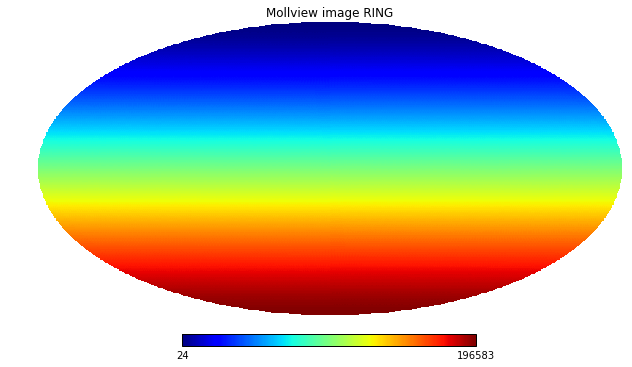

In [236]:
hp.mollview(n, title="Mollview image RING")

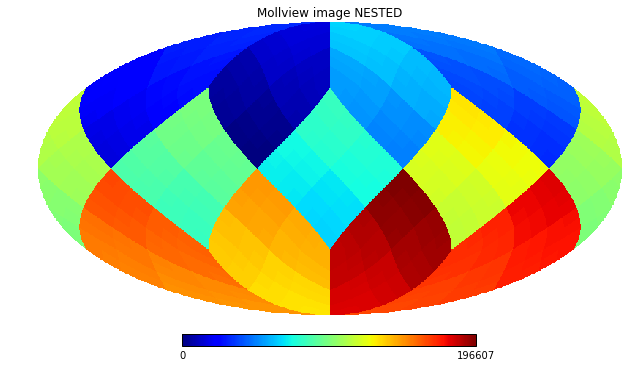

In [237]:
hp.mollview(n, nest=True, title="Mollview image NESTED")

In [238]:
hp.pixelfunc.UNSEEN = -1.6375e+30

In [239]:
# Exclui pixels ruins 
hp.pixelfunc.fit_dipole(n, nest=False, bad=-1.6375e+30, gal_cut=0)

(98303.5, array([ -4.59988602e-01,  -1.81289977e+02,  -9.83040000e+04]))

In [240]:
# Exclui pixels invisiveis
hp.pixelfunc.fit_monopole(n, nest=False, bad=-1.6375e+30, gal_cut=0)

98303.5

In [241]:
rpix = hp.ang2pix(NSIDE, theta, phi)

In [242]:
m = np.arange(hp.nside2npix(NSIDE))

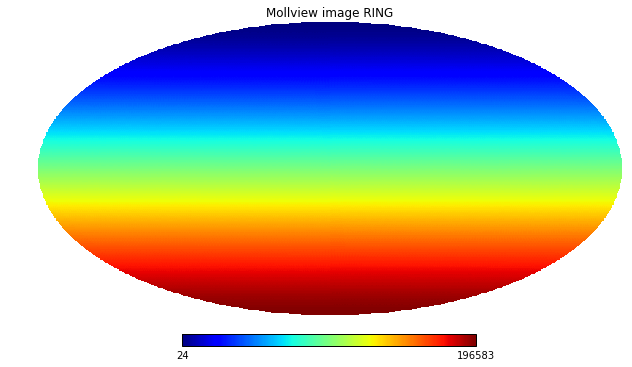

In [243]:
hp.mollview(m, title="Mollview image RING")

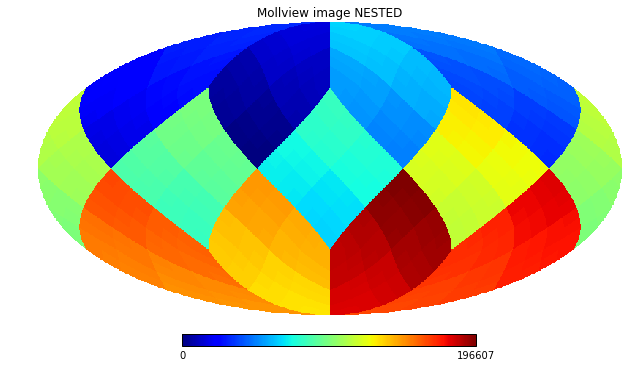

In [244]:
hp.mollview(m, nest=True, title="Mollview image NESTED")

In [245]:
# Exclui pixels ruins 
hp.pixelfunc.fit_dipole(m, nest=False, bad=-1.6375e+30, gal_cut=0)

(98303.5, array([ -4.59988602e-01,  -1.81289977e+02,  -9.83040000e+04]))

In [246]:
# Exclui pixels invisiveis
hp.pixelfunc.fit_monopole(m, nest=False, bad=-1.6375e+30, gal_cut=0)

98303.5

In [247]:
print(hp.get_map_size(m))
print(hp.get_map_size(n))

196608
196608


In [248]:
match = hp.sphtfunc.anafast(m, map2=n)

In [249]:
match = hp.sphtfunc.synfast(match, NSIDE)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


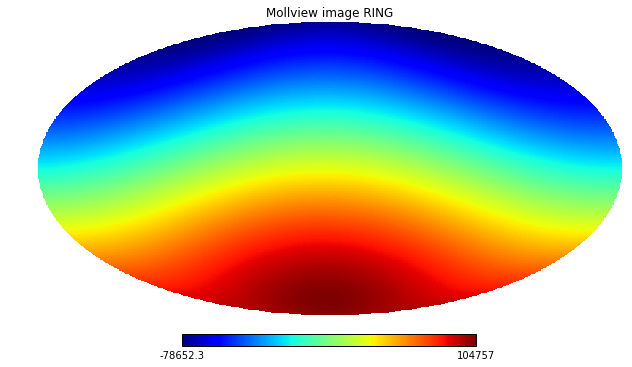

In [250]:
hp.mollview(match, title="Mollview image RING")